# Muhammad Nadeem    
# Bilal Butt 
# Mehar Hamid Ishfaq
# DS-312-A
# Application of Data Science
# Assignment no 3

In [39]:
pip install Faker


Note: you may need to restart the kernel to use updated packages.


# Python Solved This Mystery😂

In [40]:
sorted(['🥚','🐓'])

['🐓', '🥚']

In [41]:
sorted(['🐓','🥚'])

['🐓', '🥚']

# Problem Statement
# Train Model for check weather a Person is High Sugar or Low sugar and Train Model And Report Its Accuracy. 

In [87]:
import pandas as pd
from faker import Faker
import random

fake = Faker()

# Define the high sugar threshold
high_sugar_threshold = 140

# Generate 1000 records of dummy data
num_records = 1000

# Generate dummy data for each attribute
insulin = [random.uniform(2, 50) for _ in range(num_records)]
glucose = [random.uniform(70, 250) for _ in range(num_records)]
age = [fake.random_int(min=18, max=100, step=1) for _ in range(num_records)]
family_history = [random.choice(['Yes', 'No']) for _ in range(num_records)]
physical_activity = [random.uniform(1, 5) for _ in range(num_records)]
diet = [random.choice(['Low', 'Medium', 'High']) for _ in range(num_records)]

# Assign labels based on the high sugar threshold
labels = ['High' if g >= high_sugar_threshold else 'Low' for g in glucose]

# Create a pandas dataframe
df = pd.DataFrame({'Name':fake.name(),'Email':fake.email(),'Insulin_Level': insulin, 'Fasting_Glucose': glucose, 'Age': age,
                   'Family_History': family_history, 'Physical_Activity': physical_activity,
                   'Diet': diet, 'Label': labels})

# Save the dataframe as a CSV file
df.to_csv('dummy_data.csv', index=False)
df.head()

,Name,Email,Insulin_Level,Fasting_Glucose,Age,Family_History,Physical_Activity,Diet,Label
0,Faith Mccullough,catherine18@example.org,35.149173,237.214865,71,Yes,1.958651,Medium,High
1,Faith Mccullough,catherine18@example.org,31.720625,135.028612,65,No,1.234302,High,Low
2,Faith Mccullough,catherine18@example.org,35.247386,215.555406,88,Yes,2.349152,Medium,High
3,Faith Mccullough,catherine18@example.org,15.369787,219.451127,62,Yes,3.347901,High,High
4,Faith Mccullough,catherine18@example.org,12.533210,199.556730,67,Yes,1.130143,Medium,High


# Encoding

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# load data from CSV file
data = pd.read_csv('dummy_data.csv')

# define categorical columns to encode
cat_cols = ['Name', 'Email','Family_History','Diet','Label']

# create LabelEncoder object
le = LabelEncoder()

# apply LabelEncoder to each categorical column
data[cat_cols] = data[cat_cols].apply(lambda x: le.fit_transform(x))

# print the encoded data
print(data)


     Name  Email  Insulin_Level  Fasting_Glucose  Age  Family_History  \
0       0      0      35.149173       237.214865   71               1   
1       0      0      31.720625       135.028612   65               0   
2       0      0      35.247386       215.555406   88               1   
3       0      0      15.369787       219.451127   62               1   
4       0      0      12.533210       199.556730   67               1   
..    ...    ...            ...              ...  ...             ...   
995     0      0      42.623465       195.316449   56               0   
996     0      0      33.588734       133.882890   55               1   
997     0      0       5.023597       228.187132   92               0   
998     0      0      30.674663        78.264077   94               0   
999     0      0      37.077999        80.109185   46               1   

     Physical_Activity  Diet  Label  
0             1.958651     2      0  
1             1.234302     0      1  
2        

# Decision Tree

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split the data into training and testing sets
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[120   0]
 [  0  80]]


# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split data into features and target
X = data.drop("Label", axis=1)
y = data["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and target
X = data.drop("Label", axis=1)
y = data["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model and fit it to the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# I think It's not Overfit. Accuracies 1 on Test Data not on Train Data.

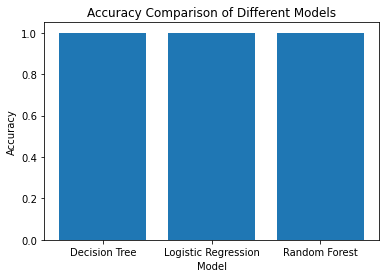

In [92]:
import matplotlib.pyplot as plt

# Define the names of the models and their accuracies
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [1.0, 1.0, 1.0]

# Create a bar plot of the accuracies
plt.bar(models, accuracies)

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

# Display the plot
plt.show()
